In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
import utils as ut

In [52]:
df = pd.read_csv("./data/creditcard.csv")
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Проверим на пропуски


<Axes: >

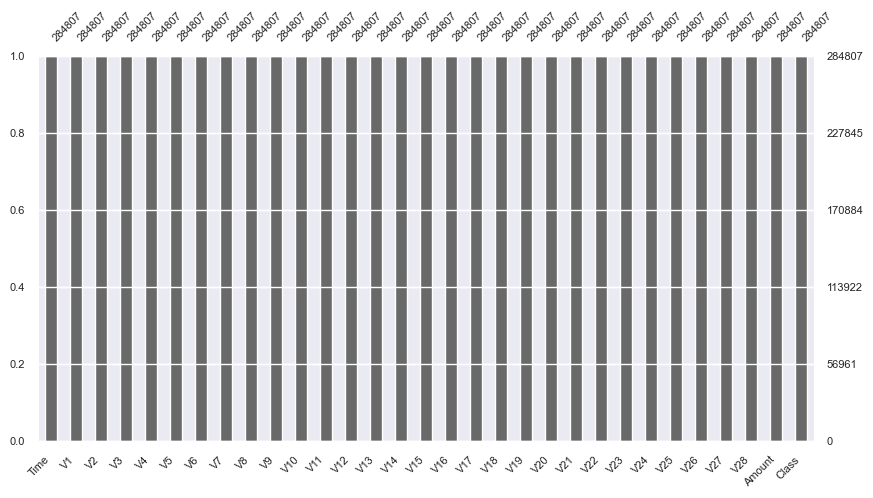

In [54]:
msno.bar(df, figsize=(10, 5), fontsize=8)

In [55]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Коротко о данных:
- Для данных был пременен PCA метод (было сказано на kaggle) -> непонятно что за данные мы вообще имеем.
- К Amount можно применить стандартизацию, чтобы она лежала примерно в тех же значениях, что и остальные данные.

## Балансировка датасета

Честные 99.83 % of the dataset
Мошеннические: 0.17 % of the dataset


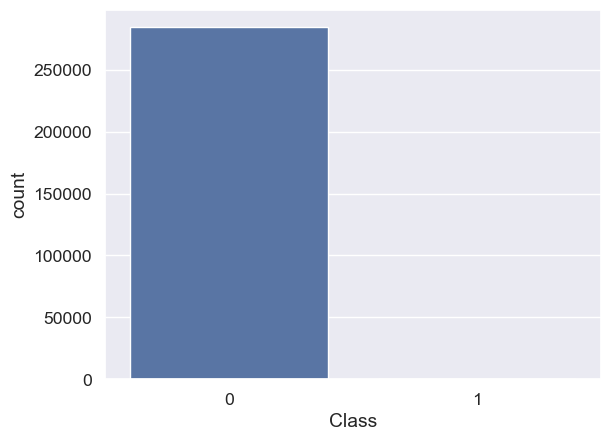

In [56]:
# Посмотрим, какой процент мошенничества в датасете
print('Честные', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Мошеннические:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot(df, x='Class')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

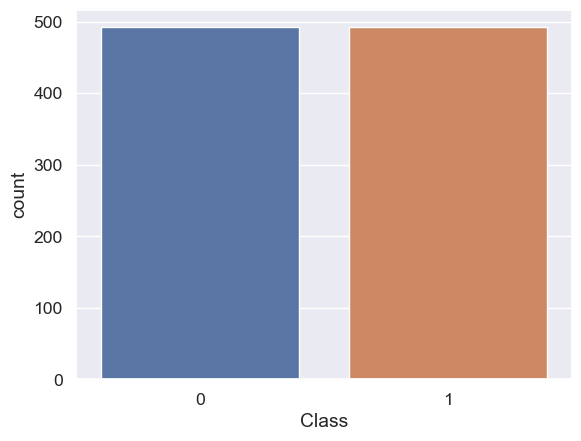

In [57]:
df = ut.balance_the_dataset(df, 'Class')
sns.countplot(df, x='Class' )

C:\Users\S\anaconda3\envs\ds_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


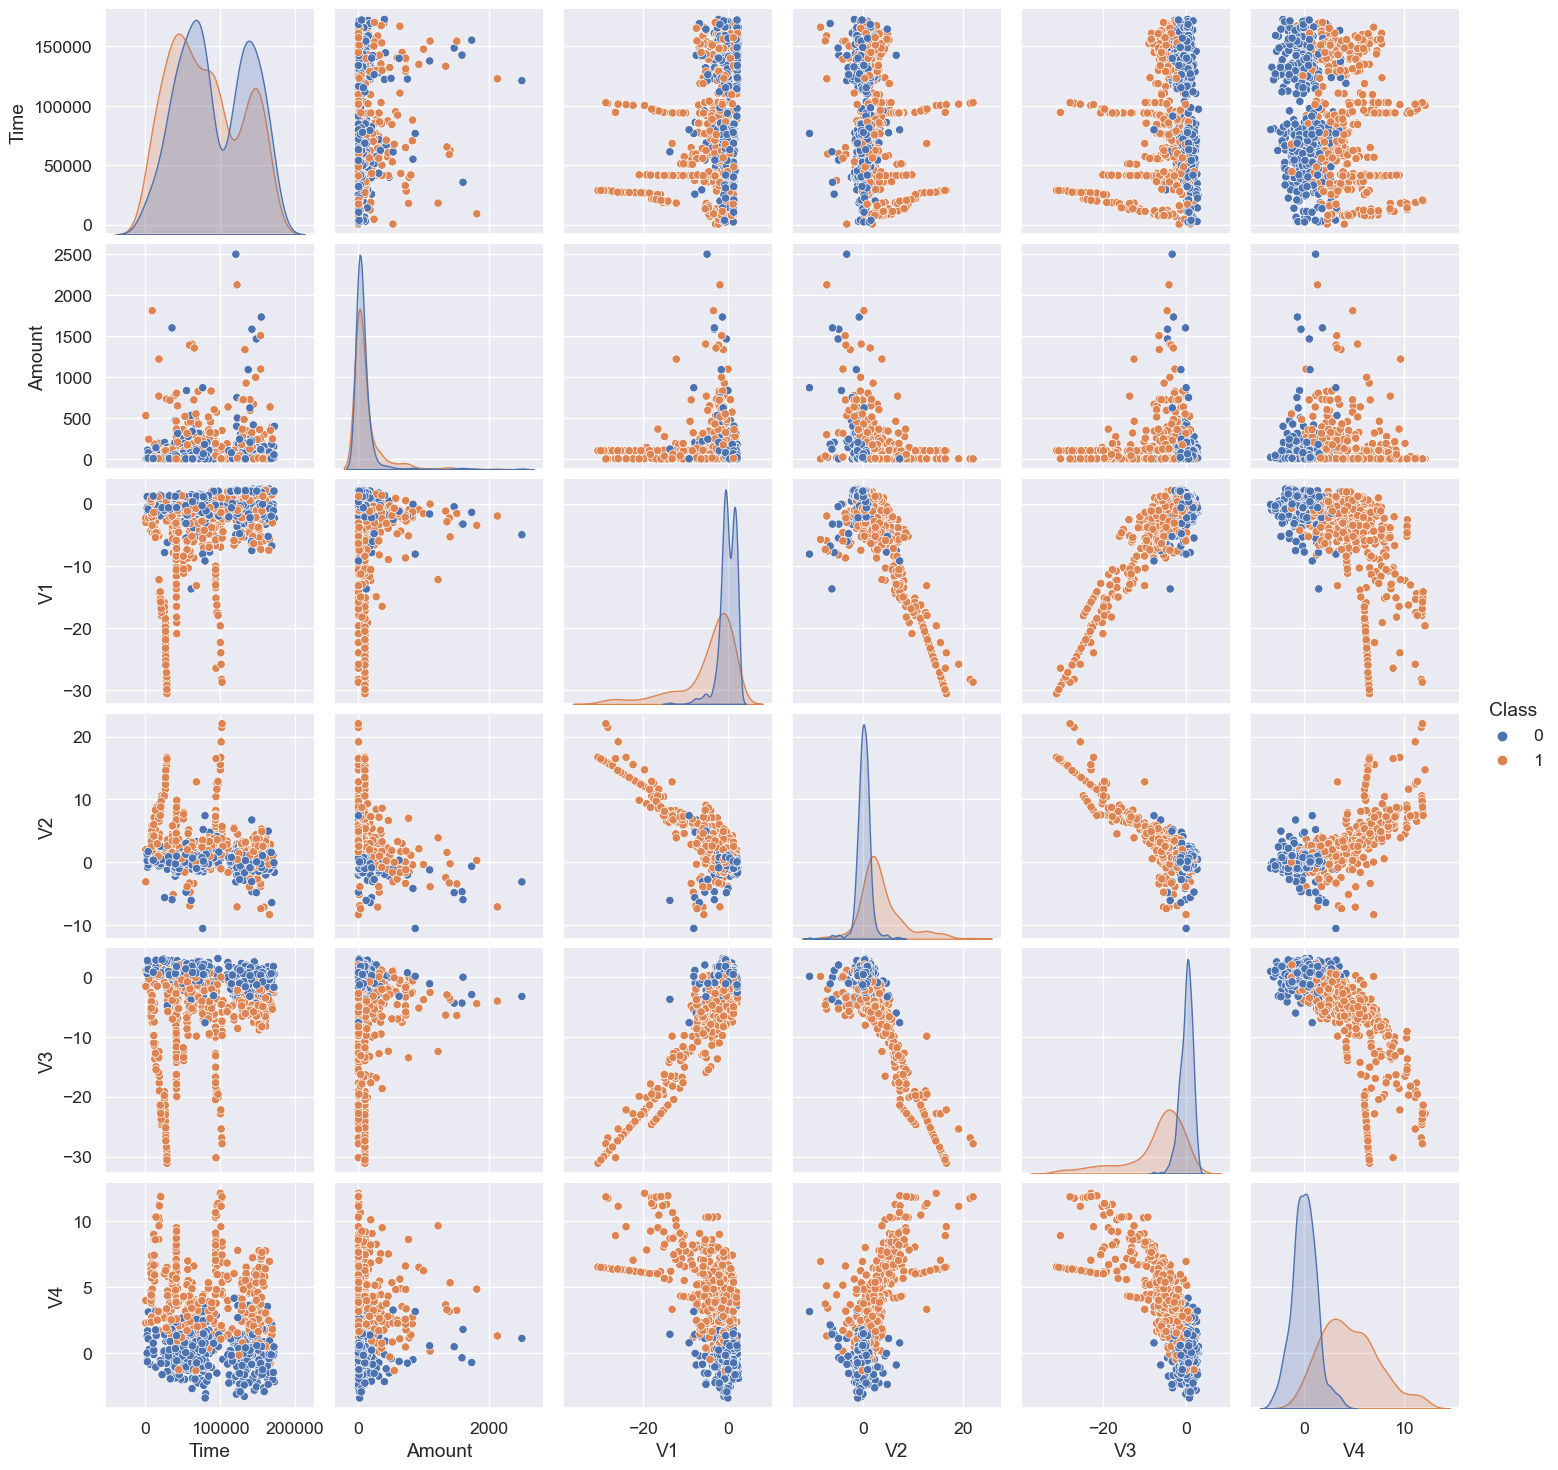

In [58]:
cols = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'Class']
sns_plot = sns.pairplot(df[cols], hue='Class')

<Axes: >

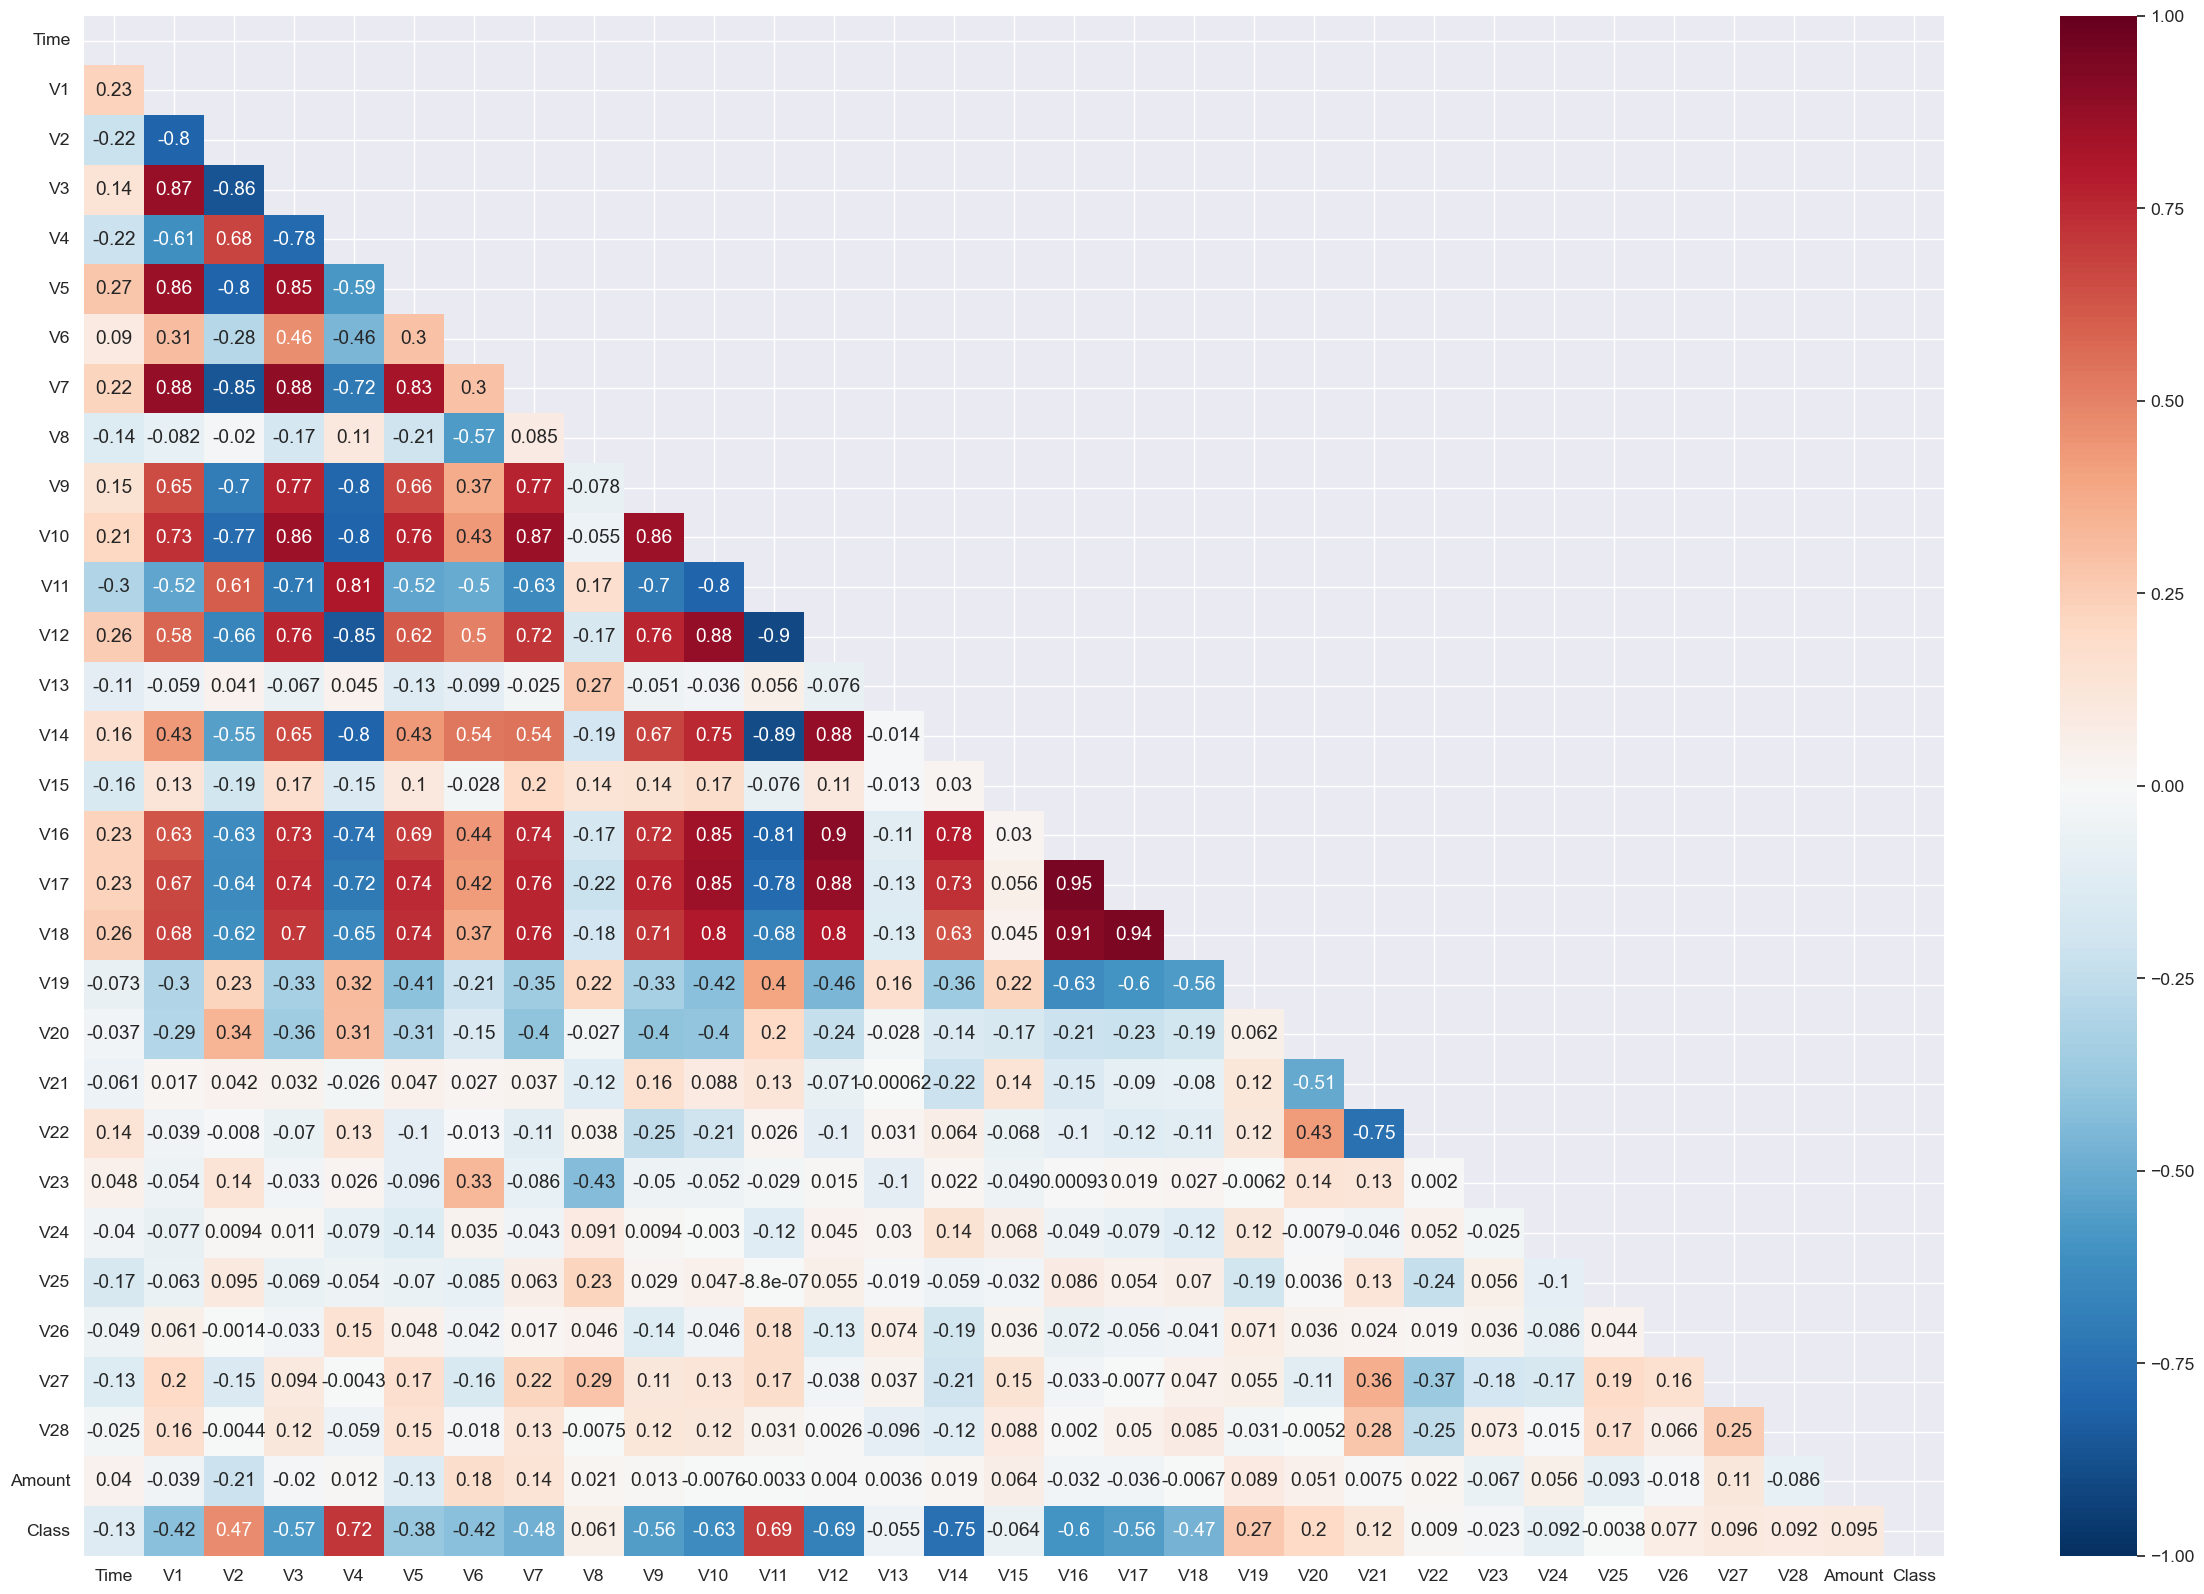

In [59]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.15)
sns.heatmap(df.corr(),
            cmap='RdBu_r', # задаёт цветовую схему
            annot=True, # рисует значения внутри ячеек
            vmin=-1, vmax=1,
            mask=np.triu(df.corr()))


### Как видно, все признаки, кроме Amount неплохо коррелируют друг с другом

## Data processing

In [60]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.419168,1
1,12597.0,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,-0.421683,1
2,161683.0,2.084799,-0.903863,-0.618918,-0.237779,-0.856415,-0.277819,-0.805167,-0.070061,0.009440,...,-0.642841,-1.363199,0.388504,-0.791320,-0.614041,-0.019803,0.000015,-0.035849,-0.234572,0
3,121916.0,2.038241,-1.200681,-0.714170,-0.578603,-0.846785,0.309391,-1.094498,0.105588,0.018192,...,-0.157011,0.097146,0.037555,-1.008598,-0.274396,0.767814,-0.020950,-0.057676,-0.164980,0
4,117310.0,2.041544,-0.144772,-2.955160,-0.578916,2.610039,3.142393,-0.417798,0.784572,0.359984,...,-0.352752,-0.996573,0.364093,0.604791,-0.264306,0.219744,-0.039079,-0.042907,-0.420447,0


In [61]:
y = df['Class']
X = df.drop(columns='Class')


In [62]:
# X.drop(columns="Time", inplace=True)  # Удалим время
X.drop(columns='Amount', inplace=True)  # Удалим Amount (было выяснено эмпирически)

## Разделим датасет на тренировочную и тестовую выборки

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Посмотрим на тестовые и тренировочные данные

Text(0.5, 1.0, 'y_test')

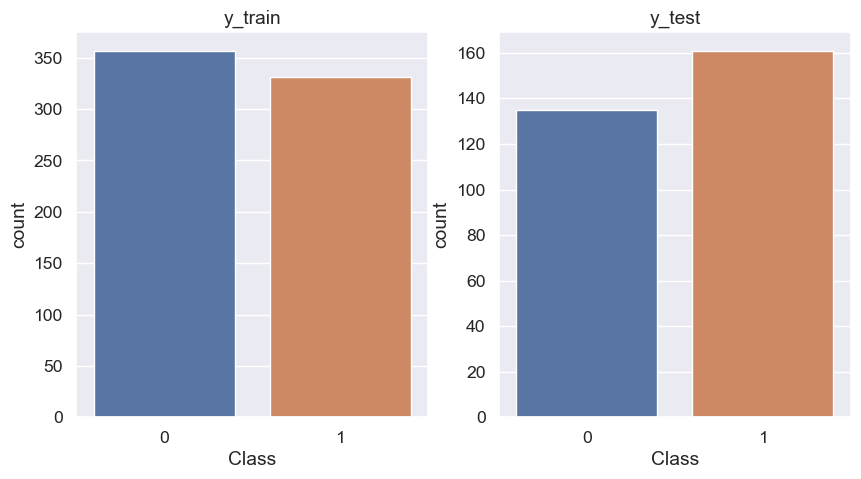

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(pd.DataFrame(y_train), x='Class', ax=ax[0])
sns.countplot(pd.DataFrame(y_test), x='Class', ax=ax[1])
ax[0].set_title('y_train')
ax[1].set_title('y_test')


In [65]:
print(X_train.describe().loc[['mean', 'std', 'min', 'max']])

               Time         V1         V2         V3         V4         V5  \
mean   86702.736919  -2.310774   1.782446  -3.240192   2.125249  -1.405373   
std    47500.151455   5.419241   3.592990   6.042686   3.083752   4.207001   
min      472.000000 -30.552380 -10.602409 -31.103685  -3.269805 -22.105532   
max   172550.000000   2.345023  22.057729   3.043405  11.906170  11.095089   

            V6         V7         V8         V9  ...       V19        V20  \
mean -0.609882  -2.537082   0.238391  -1.200175  ...  0.300458   0.149207   
std   1.793387   5.767722   4.857134   2.270462  ...  1.262750   1.084944   
min  -5.773192 -43.557242 -41.044261 -13.434066  ... -3.681904  -3.920390   
max   6.474115   8.633255  20.007208   6.953391  ...  4.851255  11.059004   

            V21       V22        V23       V24       V25       V26       V27  \
mean   0.341686  0.001160  -0.036552 -0.049227  0.054613  0.026973  0.081263   
std    2.675945  1.150979   1.286600  0.563090  0.689509  0.492

In [66]:
print(X_test.describe().loc[['mean', 'std', 'min', 'max']])


               Time         V1         V2         V3         V4         V5  \
mean   87359.878378  -2.862063   2.164592  -4.058515   2.593343  -1.922455   
std    48208.650373   5.651811   3.727742   6.661965   3.358132   4.273380   
min      406.000000 -29.200329  -7.449015 -30.177317  -3.393556 -21.225810   
max   169347.000000   2.209722  16.497472   2.706431  12.114672   6.198304   

            V6         V7         V8        V9  ...       V19       V20  \
mean -0.731914  -3.258928   0.343646 -1.504310  ...  0.448682  0.158764   
std   1.813190   6.142631   5.023610  2.395379  ...  1.234889  1.126355   
min  -6.406267 -31.197329 -37.353443 -9.462573  ... -2.721853 -6.003578   
max   7.355276  11.858880  19.168327  3.801353  ...  5.228342  3.834649   

            V21       V22       V23       V24       V25       V26       V27  \
mean   0.452051  0.008757  0.037793 -0.064271  0.019355 -0.013097  0.051231   
std    3.108806  1.233912  0.795601  0.543311  0.610487  0.435609  1.190759

## Попробуем несколько разных классификаторов

In [67]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report

In [68]:
def fit_predict(model, eval_data):
    try:
        model = model(n_jobs=-1)
    except TypeError:
        model = model(random_state=42)
    finally:
        X_train = eval_data['X_train'] if type(eval_data['X_train']) == np.ndarray else eval_data['X_train'].values
        y_train = eval_data['y_train'] if type(eval_data['y_train']) == np.ndarray else eval_data['y_train'].values
        X_test = eval_data['X_test'] if type(eval_data['X_test']) == np.ndarray else eval_data['X_test'].values

        model.fit(X_train, y_train.ravel())
        pred = model.predict(X_test)
        return model, pred




In [69]:
eval_data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
models = [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier]
max_evals = len(models)
metric = roc_auc_score  # f1_score, roc_auc_score, accuracy_score
metrics = []
fitted_models = []

for model in models:
    model_fitted, pred = fit_predict(model, eval_data)

    metrics.append(metric(eval_data['y_test'].values.ravel(), pred))
    fitted_models.append(model_fitted)

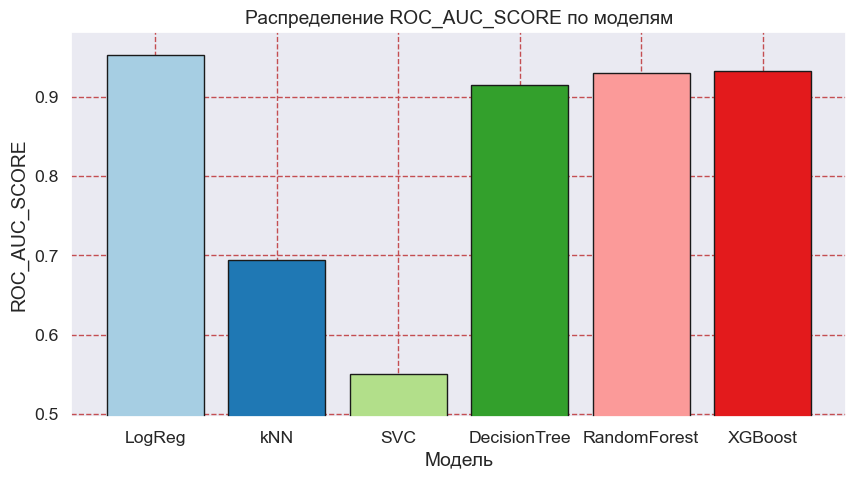

In [70]:
models_names = ['LogReg', 'kNN', 'SVC', 'DecisionTree', 'RandomForest', 'XGBoost']
ut.plot_metrics_hist(models_names, metrics)

In [71]:
best_metric = max(metrics)
best_model_name = models_names[metrics.index(best_metric)]
best_model = fitted_models[metrics.index(best_metric)]

print('Best Model:', best_model_name)
print('Best Metric, ROC_AUC_SCORE:', round(best_metric, 4))

Best Model: LogReg
Best Metric, ROC_AUC_SCORE: 0.9535


In [72]:
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       135
           1       0.97      0.94      0.96       161

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



- Amount: **удален**
- Time: **удален**
- Best Model: **XGBoost**
- Best Metric: **0.951**

- Amount: **присутствует**
- Time: **удален**
- Best Model: **LogReg**
- Best Metric: **0.9467**

- Amount: **удален**
- Time: **присутствует**
- Best Model: **LogReg**
- Best Metric: **0.9535**

- Amount: **присутствует**
- Time: **присутствует**
- Best Model: **LogReg**
- Best Metric: **0.9498**

#### Можно было бы еще попробовать подобрать параметры моделей с gridsearch или hyperopt, но не думаю, что именно для этой задачи это нужно) (я попробовал -> к сильному улучшению результата это не привело)